<a href="https://colab.research.google.com/github/AkindeKadjo/White_Wine_Quality/blob/main/005_Project2_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Akinde Kadjo

Date: 10/19/22

#Project: White Wine Quality

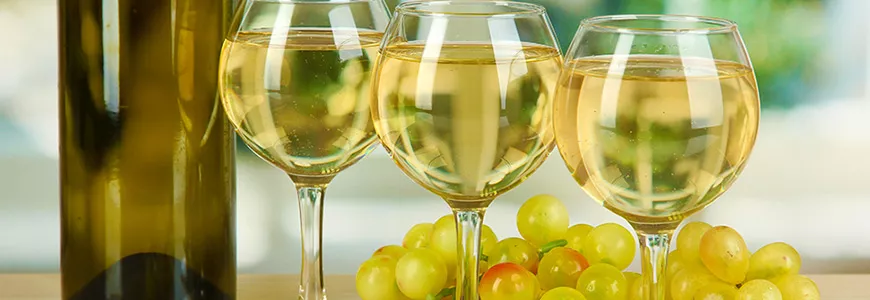

Image Taken from [adrianysus.*com*](https://adrianysus.com/en/what-is-the-difference-between-chardonnay-pinot-grigio-and-sauvignon-blanc/)

**The goal  of the project is to model wine quality based on physicochemical tests**

The provided datasets is that of the white vinho verde wine samples, from the north of Portugal. [Data Source](https://archive.ics.uci.edu/ml/datasets/wine+quality)



---



---




In [1]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,roc_auc_score,PrecisionRecallDisplay, RocCurveDisplay,f1_score

from sklearn import set_config
set_config(display='diagram')

In [2]:
#Loading the data
filename = '/content/drive/MyDrive/Coding Dojo/07 Week 7 Classification/winequality-white.csv'
Original_df = pd.read_csv(filename)
# keeping a copy of the df as a safety net
df = Original_df.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


A quick check for the data info is done to have an overall idea of the loaded data set

In [3]:
#checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
#renaming the columns
df = df.rename(columns={'fixed acidity':'fixed_acidity',
                          'volatile acidity':'volatile_acidity',
                          'citric acid':'citric_acid',
                          'residual sugar':'residual_sugar', 
                          'free sulfur dioxide':'free_sulfur_dioxide',
                          'total sulfur dioxide':'total_sulfur_dioxide'})
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#Data Cleaning

##Checking for missing values and duplicates

In [5]:
# how many data points are duplicated?
df.duplicated().sum()

937

In [6]:
#I'll go ahead and drop them and check again to see if there are still duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
#check for missing values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##Addressing Data Inconcistencies

>Scaling the data to remove any significant outliers for the numerical data. A Statistical over-view of the data is done through the describe function.

In [8]:
df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00
mean,6.84,0.28,0.33,5.91,0.05,34.89,137.19,0.99,3.20,0.49,10.59,5.85
std,0.87,0.10,0.12,4.86,0.02,17.21,43.13,0.00,0.15,0.11,1.22,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.60,0.04,23.00,106.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,4.70,0.04,33.00,133.00,0.99,3.18,0.48,10.40,6.00
75%,7.30,0.33,0.39,8.90,0.05,45.00,166.00,1.00,3.29,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [9]:
#Removing the density column since there is not much variation
new_df = df.drop(columns=['density'])#, inplace=True)
new_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,3.18,0.47,9.6,6


In [10]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
scaled_df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
count,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.51,-1.94,-2.73,-1.09,-1.60,-1.91,-2.97,-3.14,-2.38,-2.13,-3.21
25%,-0.62,-0.68,-0.53,-0.89,-0.47,-0.69,-0.72,-0.70,-0.71,-0.90,-0.96
50%,-0.05,-0.20,-0.12,-0.25,-0.17,-0.11,-0.10,-0.10,-0.09,-0.16,0.16
75%,0.53,0.48,0.45,0.61,0.18,0.59,0.67,0.62,0.53,0.67,0.16
max,8.49,7.92,10.83,12.32,12.99,14.77,7.02,4.12,5.19,2.97,3.53


In [11]:
#Removing outliers with maximum std above 5
scaled_df = scaled_df[scaled_df  <= 5]  
scaled_df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
count,3959.00,3953.00,3953.00,3959.00,3916.00,3954.00,3959.00,3961.00,3959.00,3961.00,3961.00
mean,-0.00,-0.01,-0.01,-0.00,-0.08,-0.01,-0.00,0.00,-0.00,-0.00,-0.00
std,0.99,0.96,0.96,0.98,0.68,0.95,0.99,1.00,0.99,1.00,1.00
min,-3.51,-1.94,-2.73,-1.09,-1.60,-1.91,-2.97,-3.14,-2.38,-2.13,-3.21
25%,-0.62,-0.68,-0.53,-0.89,-0.47,-0.69,-0.72,-0.70,-0.71,-0.90,-0.96
50%,-0.05,-0.20,-0.12,-0.25,-0.17,-0.11,-0.10,-0.10,-0.09,-0.16,0.16
75%,0.53,0.38,0.45,0.59,0.18,0.59,0.67,0.62,0.53,0.67,0.16
max,4.45,4.88,4.70,4.14,4.94,4.86,4.80,4.12,4.58,2.97,3.53


In [12]:
#Reverting the scaling
cleaned_df = pd.DataFrame(scaler.inverse_transform(scaled_df),columns = scaled_df.columns[0:])
cleaned_df.dropna(inplace=True)
cleaned_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6.0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,3.18,0.47,9.6,6.0


#Assessing the factors affecting the Wine quality

##Countplot

>The Countplot gives us an overview of the distributions of the wine quality in our dataset.

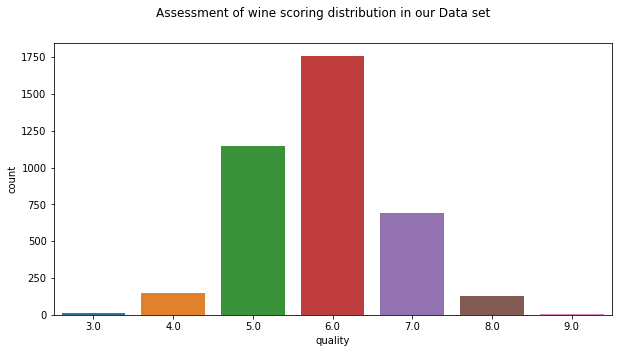

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plt.suptitle('Assessment of wine scoring distribution in our Data set')
sns.countplot( data=cleaned_df, x='quality');

>The majority of wine in our data set have a quality metric 6 with very few on the lower end of 3 as well as the high end of 9.

##Barplot

>These set of graphs are an indication of how each item correlate to the wine quality. Since the wine quality values were provided in discret numbers. I decided to group them by their quality metrics.

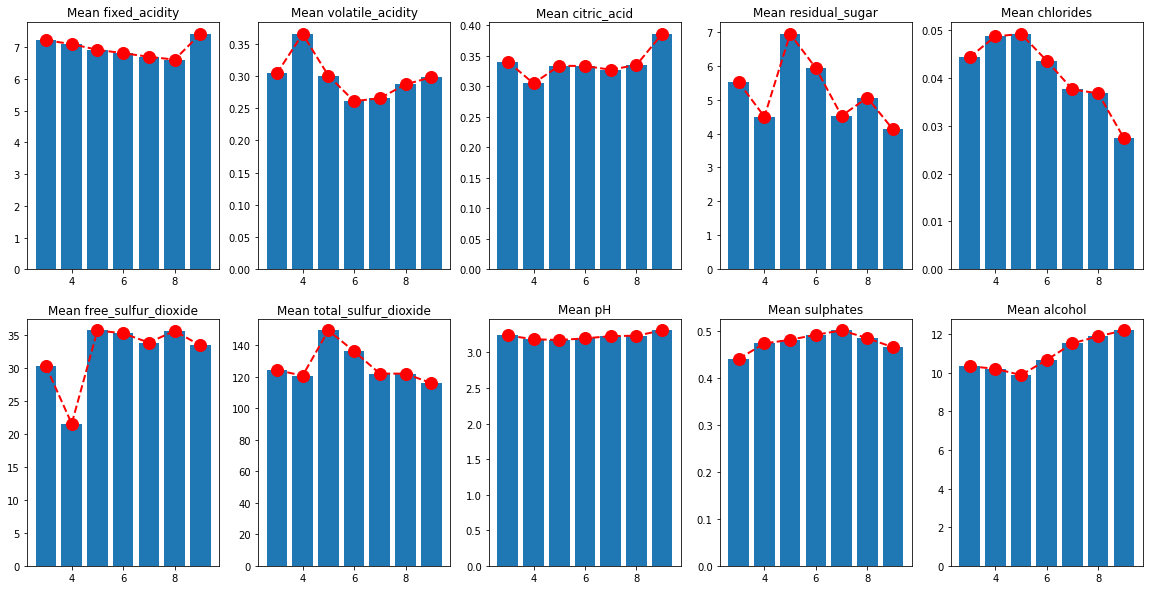

In [14]:
# Group the dataframe by cluster and aggregate by mean values
quality_groups = cleaned_df.groupby('quality', as_index=False).mean()
# Visualize means 
fig, axes = plt.subplots(2,5, figsize = (20, 10))
# fig is an array of dimensions 2,5.  axes.ravel() will flatten it to 10,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure
for i, col in enumerate(quality_groups.columns[1:]):
  axes[i].bar(quality_groups['quality'], quality_groups[col])
  axes[i].plot(quality_groups['quality'], quality_groups[col],color='red', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
  axes[i].set_title(f'Mean {col}')

>Let's analyze them columns by columns.

>fixed acidity: In general it decreases as the quality increases with the exception of the wine quality of 9. We also need to take in accunt that we have very little sample of wine quality 9.

>volatile acidity, citric acid , residual sugar, free sulfur dioxide : Not much can be derived from them as there are no obvious trends.

>chlorides: it consistently decreases as the quality increases.

>total sulfur dioxide: In general it decreases as the quality increases with the exception of the wine quality of 4.

>pH: it steadly increases with the quality.

>sulphates:  it steadly increases with the quality then drops off after wine quality of 7.

>alcohol: it somewhat increases with the quality with the exception of the wine quality of 4 and 5.


#Wine Quality Prediction with Machine learning

>The wine quality data provided are discret i.e. non-continous. This mean I could solve the problem 2 ways: On one end, use a regression method since the quality metrics are ordinal, while on the other end use a classification method since as stated above, the numbers are discret.

>My methods of Choise will be RandomForestRegressor, XGBRegressor, RandomForestClassifier and XGBClassifier both with and without PCA. All results will be assessed and the best method will be chosen.

##Data Splitting and Preprocessing

In [15]:
#setting y as a target column being Quality
y = cleaned_df['quality']
#setting X as the feature data, I'll include the rest of the columns
X = cleaned_df.drop(columns='quality')
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,3.18,0.47,9.6


>Performing a train test split, here the random state of 42 is chosen for concistency

In [16]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Create a PCA object that will retain 95% of the variance when transforming
pca = PCA(n_components=.95)

##Solving it with a Regression method

> I'm creating a function that will output the metrics for my model prediction evaluation

In [18]:
#creating a data frame output of the metrics
def res_regression(model,xtest,ytest,xtrain,ytrain, label='X Regression'):
  """Output regression metrics for both the test and the train data"""
 
  ## Get Predictions
  test_pred = model.predict(xtest)
  train_pred = model.predict(xtrain)
  ## Creating a header
  print('---'*20)
  print(f"[i] REPORT FOR: {label}")
  print('---'*20)
  #test metrics
  mse_test = mean_squared_error(ytest, test_pred)
  rmse_test = np.sqrt(mse_test).round(0)
  r2_test = r2_score(ytest, test_pred).round(4)
  res_df_test = pd.DataFrame([rmse_test,r2_test], columns=['Test data'],index=['RMSE','R2'])
  #train metrics
  mse_train = mean_squared_error(ytrain, train_pred)
  rmse_train = np.sqrt(mse_train).round(0)
  r2_train = r2_score(ytrain, train_pred).round(4)
  res_df_train = pd.DataFrame([rmse_train,r2_train],columns=['Training data'],index=['RMSE','R2'])
  res_df = pd.concat([res_df_test, res_df_train],axis = 1)
  return res_df

###RandomForest Regressor without PCA

In [19]:
#instantiating random forest
rf = RandomForestRegressor(random_state = 42)
#create the pipeline
rf_pipe_nopca = make_pipeline(scaler, rf)
#train model on training data
rf_pipe_nopca.fit(X_train,y_train)
# Evaluating Random Forest Regressor
res_regression(rf_pipe_nopca,X_test,y_test, X_train,y_train, label='Random Forest Regressor')

------------------------------------------------------------
[i] REPORT FOR: Random Forest Regressor
------------------------------------------------------------


,Test data,Training data
RMSE,1.0000,0.0000
R2,0.3421,0.9121


The training set did perform well with a R2 above 0.9 and a RMSE of 0, however the test set has a much lower R2 of 0.3421 and a much higher RMSE of 1. This may be a case of overfitting, a model tuning is needed.

In [20]:
#Tuning max_depth
  #pulling out max depths
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
  #Running through a series of values to find the best depth
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   rf_model = RandomForestRegressor(max_depth=depth,random_state = 42)
   rf_pipe_model = make_pipeline(scaler, rf_model)
   rf_pipe_model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = rf_pipe_model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = rf_pipe_model.score(X_test, y_test)  
# sorting the dataframe by test scores and printing the best depth
best_depth = scores.sort_values(by='Test Score', ascending=False).index[0]
best_depth

26

In [21]:
#Tuning n_estimators
n_ests = [10, 50, 75, 100, 125, 150, 175, 200, 225, 250, 500, 750, 1000]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   rf_model = RandomForestRegressor(max_depth=best_depth, n_estimators=n,random_state = 42)
   rf_pipe_model = make_pipeline(scaler, rf_model)
   rf_pipe_model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = rf_pipe_model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = rf_pipe_model.score(X_test, y_test)
# sorting the dataframe by test scores and printing the best n estimator
best_n_estimator = scores2.sort_values(by='Test Score', ascending=False).index[0]
best_n_estimator  

500

>Optimized RandomForest Regressor without PCA

In [22]:
#instantiating random forest
rf = RandomForestRegressor(max_depth=best_depth, n_estimators=best_n_estimator,random_state = 42)
#create the pipeline
rf_pipe_nopca = make_pipeline(scaler, rf)
#train model on training data
rf_pipe_nopca.fit(X_train,y_train)
# Evaluating Random Forest Regressor
res_regression(rf_pipe_nopca,X_test,y_test, X_train,y_train, label='Optimized Random Forest Regressor')

------------------------------------------------------------
[i] REPORT FOR: Optimized Random Forest Regressor
------------------------------------------------------------


,Test data,Training data
RMSE,1.0000,0.000
R2,0.3483,0.915


A slight improvement  is not but not much. We went from an R2 of 0.3421 to 0.3483 for the test data. let's see what we get with the other methods

###RandomForest Regressor with  PCA

In [23]:
#instantiating random forest
rf2 = RandomForestRegressor(random_state = 42)
#create the pipeline
rf_pipe_pca = make_pipeline(scaler,pca, rf2)
#train model on training data
rf_pipe_pca.fit(X_train,y_train)
# Evaluating Random Forest Regressor
res_regression(rf_pipe_pca,X_test,y_test, X_train,y_train, label='Random Forest Regressor with PCA')

------------------------------------------------------------
[i] REPORT FOR: Random Forest Regressor with PCA
------------------------------------------------------------


,Test data,Training data
RMSE,1.0000,0.0000
R2,0.3545,0.9092


The result is better than without PCA. We went from an R2 of 0.3483 to 0.3545 for the test data. Let's see what we get after tuning it

In [24]:
#Tuning max_depth
  #pulling out max depths
est_depths = [estimator.get_depth() for estimator in rf2.estimators_]
  #Running through a series of values to find the best depth
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   rf_model = RandomForestRegressor(max_depth=depth,random_state = 42)
   rf_pipe_model = make_pipeline(scaler,pca, rf_model)
   rf_pipe_model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = rf_pipe_model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = rf_pipe_model.score(X_test, y_test)  
# sorting the dataframe by test scores and printing the best depth
best_depth2 = scores.sort_values(by='Test Score', ascending=False).index[0]
best_depth2

22

In [25]:
#Tuning n_estimators
n_ests = [10, 50, 75, 100, 125, 150, 175, 200, 225, 250, 500, 750, 1000]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   rf_model = RandomForestRegressor(max_depth=best_depth2, n_estimators=n,random_state = 42)
   rf_pipe_model = make_pipeline(scaler,pca, rf_model)
   rf_pipe_model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = rf_pipe_model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = rf_pipe_model.score(X_test, y_test)
# sorting the dataframe by test scores and printing the best n estimator
best_n_estimator2 = scores2.sort_values(by='Test Score', ascending=False).index[0]
best_n_estimator2  

750

>Optimized RandomForest Regressor without PCA

In [26]:
#instantiating random forest
rf2 = RandomForestRegressor(max_depth=best_depth2, n_estimators=best_n_estimator2,random_state = 42)
#create the pipeline
rf_pipe_pca = make_pipeline(scaler,pca, rf2)
#train model on training data
rf_pipe_pca.fit(X_train,y_train)
# Evaluating Random Forest Regressor
res_regression(rf_pipe_pca,X_test,y_test, X_train,y_train, label='Optimized Random Forest Regressor with PCA')

------------------------------------------------------------
[i] REPORT FOR: Optimized Random Forest Regressor with PCA
------------------------------------------------------------


,Test data,Training data
RMSE,1.0000,0.0000
R2,0.3675,0.9115


A much better improvement was achieved. We went from an R2 of 0.3545 to 0.3675 for the test data. Still a R2 value much lower than 0.7 is not that desireable. Hopefully our next method provides better results. 

###XGBoost Regressor with  PCA

>This method will only be tested with PCA as in the results above the addition of PCA to the pipeline improved the outcome

In [27]:
# Instantiate and fit XGBoost
xgb = XGBRegressor()
#create the pipeline
xgb_pca = make_pipeline(scaler,pca, xgb)
#train model on training data
xgb_pca.fit(X_train, y_train)
# Evaluating XGBoost
res_regression(xgb_pca,X_test,y_test, X_train,y_train, label='XGBoost Regressor with PCA')

[05:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
------------------------------------------------------------
[i] REPORT FOR: XGBoost Regressor with PCA
------------------------------------------------------------


,Test data,Training data
RMSE,1.0000,1.0000
R2,0.3164,0.4853


The overall results are much lower both for the test data and the training data. I will skip any any optimization as I don't believe the results will drasctically improve.

##Solving it with a Classification method

I'm creating a function that will output the metrics for my model prediction evaluation

In [28]:
#code copied from the 'SOLUTION-8.15_ROC_AUC_Code_along_Notebook-V2' shared on Discord
def evaluate_classiffication(model, X_test, y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Blues'): 
                             
    ## Get Predictions
    y_pred = model.predict(X_test)
     
   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred, zero_division=0))

    fig, ax = plt.subplots(figsize=figsize)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,ax=ax )    
    plt.show()

In [29]:
#is the data balanced?
cleaned_df['quality'].value_counts(normalize=True)

6.0    0.452277
5.0    0.294572
7.0    0.177000
4.0    0.037561
8.0    0.033702
3.0    0.003602
9.0    0.001286
Name: quality, dtype: float64

###RandomForest Classifier without PCA

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: the Test Data using Random Forest Classification without PCA
------------------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.67      0.17      0.27        36
         5.0       0.52      0.58      0.55       267
         6.0       0.56      0.65      0.60       455
         7.0       0.55      0.39      0.45       186
         8.0       0.50      0.08      0.14        25
         9.0       0.00      0.00      0.00         1

    accuracy                           0.54       972
   macro avg       0.40      0.27      0.29       972
weighted avg       0.54      0.54      0.53       972



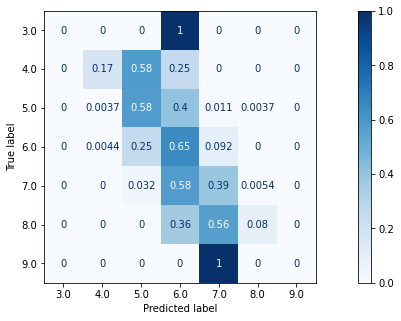

In [30]:
# Instantiating Random Forest Classifier
rf_clf_nopca = RandomForestClassifier(random_state=42)
# Setting up the pipeline and fitting the data
rf_clf_nopca_pipe = make_pipeline(scaler, rf_clf_nopca)
rf_clf_nopca_pipe.fit(X_train, y_train)
## Evaluate the Random Forest Classification model with the test data
evaluate_classiffication(rf_clf_nopca_pipe, X_test,y_test,label='the Test Data using Random Forest Classification without PCA')

We have an overall accuracy of 54%. 65% of the wine quality #6 are acurately predicted with the second best of 58% for wine quality #5. This is also due in part to the fact that these are the largest data sets. All of the wine quality #3 and #9 were falsely predicted to be #6 and #7 respectively.

###RandomForest Classifier without PCA with balanced weight class

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: the Test Data using Random Forest Classification without PCA Balanced weight
------------------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.69      0.25      0.37        36
         5.0       0.55      0.57      0.56       267
         6.0       0.56      0.69      0.62       455
         7.0       0.58      0.35      0.44       186
         8.0       0.50      0.12      0.19        25
         9.0       0.00      0.00      0.00         1

    accuracy                           0.56       972
   macro avg       0.41      0.28      0.31       972
weighted avg       0.56      0.56      0.55       972



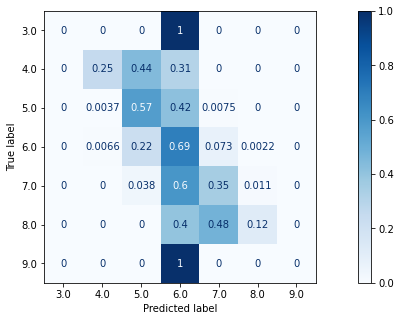

In [36]:
# Instantiating Random Forest Classifier
rf_clf_nopcaw = RandomForestClassifier(random_state=42, class_weight="balanced")
# Setting up the pipeline and fitting the data
rf_clf_nopca_pipew = make_pipeline(scaler, rf_clf_nopcaw)
rf_clf_nopca_pipew.fit(X_train, y_train)
## Evaluate the Random Forest Classification model with the test data
evaluate_classiffication(rf_clf_nopca_pipew, X_test,y_test,label='the Test Data using Random Forest Classification without PCA Balanced weight')

Adding a balanced weight slighlty improves the overall accuracy from 54% to 56%

###RandomForest Classifier with  PCA

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: the Test Data using Random Forest Classification with PCA
------------------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.50      0.08      0.14        36
         5.0       0.53      0.54      0.53       267
         6.0       0.55      0.71      0.62       455
         7.0       0.56      0.31      0.40       186
         8.0       1.00      0.04      0.08        25
         9.0       0.00      0.00      0.00         1

    accuracy                           0.55       972
   macro avg       0.45      0.24      0.25       972
weighted avg       0.55      0.55      0.52       972



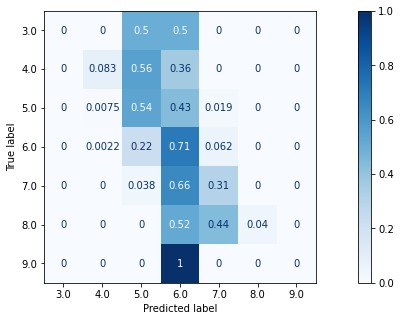

In [37]:
# Instantiating Random Forest Classifier
rf_clf_pca = RandomForestClassifier(random_state=42, class_weight="balanced")
# Setting up the pipeline and fitting the data
rf_clf_pca_pipe = make_pipeline(scaler, pca, rf_clf_pca)
rf_clf_pca_pipe.fit(X_train, y_train)
## Evaluate the Random Forest Classification model with the test data
evaluate_classiffication(rf_clf_pca_pipe, X_test,y_test,label='the Test Data using Random Forest Classification with PCA')

The overall accuracy slightly decreased to 55%. However, there is an improvement from 69% to 71% for the wine quality #6 in acuracy. The one data point for the wine quality #9 is still falsly predicted to be #6.

###XGBoost Classifier with  PCA

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: the Test Data using XGBoost Classification with PCA
------------------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.50      0.06      0.10        36
         5.0       0.54      0.54      0.54       267
         6.0       0.53      0.70      0.60       455
         7.0       0.48      0.27      0.35       186
         8.0       0.50      0.04      0.07        25
         9.0       0.00      0.00      0.00         1

    accuracy                           0.53       972
   macro avg       0.36      0.23      0.24       972
weighted avg       0.52      0.53      0.50       972



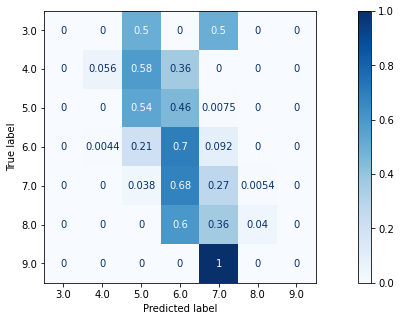

In [32]:
# Instantiate and fit XGBoost
xgb_cl = XGBClassifier()
#create the pipeline
xgb_clpca = make_pipeline(scaler,pca, xgb_cl)
#train model on training data
xgb_clpca.fit(X_train, y_train)
# Evaluating XGBoost Classification model with the test data
evaluate_classiffication(xgb_clpca, X_test,y_test,label='the Test Data using XGBoost Classification with PCA')

#Comparing Results

##Regression methods

In [33]:
print(res_regression(rf_pipe_nopca,X_test,y_test, X_train,y_train, label='Random Forest Regressor'))
print(res_regression(rf_pipe_nopca,X_test,y_test, X_train,y_train, label='Optimized Random Forest Regressor') )
print(res_regression(rf_pipe_pca,X_test,y_test, X_train,y_train, label='Optimized Random Forest Regressor with PCA'))
print(res_regression(xgb_pca,X_test,y_test, X_train,y_train, label='XGBoost Regressor with PCA'))

------------------------------------------------------------
[i] REPORT FOR: Random Forest Regressor
------------------------------------------------------------
      Test data  Training data
RMSE     1.0000          0.000
R2       0.3483          0.915
------------------------------------------------------------
[i] REPORT FOR: Optimized Random Forest Regressor
------------------------------------------------------------
      Test data  Training data
RMSE     1.0000          0.000
R2       0.3483          0.915
------------------------------------------------------------
[i] REPORT FOR: Optimized Random Forest Regressor with PCA
------------------------------------------------------------
      Test data  Training data
RMSE     1.0000         0.0000
R2       0.3675         0.9115
------------------------------------------------------------
[i] REPORT FOR: XGBoost Regressor with PCA
------------------------------------------------------------
      Test data  Training data
RMSE     1

>Overall, using regression models as a way of predicting of wine quality did not quite pan out to be successfull. PCA improved the prediction using a Random forest Regressor. Tuning it for the best depth and n_estimator helped bring up the R2 value. XGBoost regressor performed the worst.

##Classification models

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: the Test Data using Random Forest Classification without PCA
------------------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.67      0.17      0.27        36
         5.0       0.52      0.58      0.55       267
         6.0       0.56      0.65      0.60       455
         7.0       0.55      0.39      0.45       186
         8.0       0.50      0.08      0.14        25
         9.0       0.00      0.00      0.00         1

    accuracy                           0.54       972
   macro avg       0.40      0.27      0.29       972
weighted avg       0.54      0.54      0.53       972



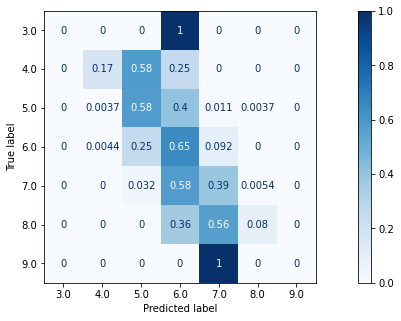

None
------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: the Test Data using Random Forest Classification without PCA Balanced weight
------------------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.69      0.25      0.37        36
         5.0       0.55      0.57      0.56       267
         6.0       0.56      0.69      0.62       455
         7.0       0.58      0.35      0.44       186
         8.0       0.50      0.12      0.19        25
         9.0       0.00      0.00      0.00         1

    accuracy                           0.56       972
   macro avg       0.41      0.28      0.31       972
weighted avg       0.56      0.56      0.55       972



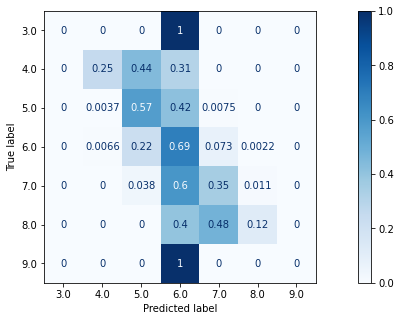

None
------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: the Test Data using Random Forest Classification with PCA
------------------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.50      0.08      0.14        36
         5.0       0.53      0.54      0.53       267
         6.0       0.55      0.71      0.62       455
         7.0       0.56      0.31      0.40       186
         8.0       1.00      0.04      0.08        25
         9.0       0.00      0.00      0.00         1

    accuracy                           0.55       972
   macro avg       0.45      0.24      0.25       972
weighted avg       0.55      0.55      0.52       972



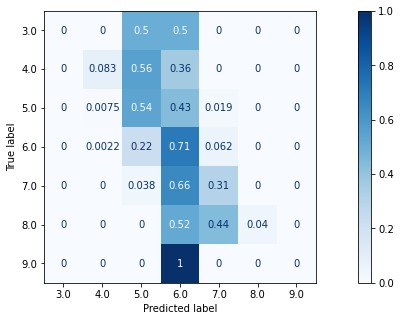

None
------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: the Test Data using Random Forest Classification with PCA
------------------------------------------------------------
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.50      0.06      0.10        36
         5.0       0.54      0.54      0.54       267
         6.0       0.53      0.70      0.60       455
         7.0       0.48      0.27      0.35       186
         8.0       0.50      0.04      0.07        25
         9.0       0.00      0.00      0.00         1

    accuracy                           0.53       972
   macro avg       0.36      0.23      0.24       972
weighted avg       0.52      0.53      0.50       972



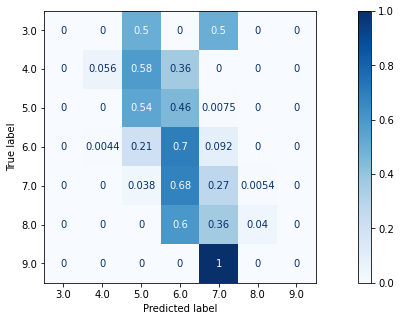

None


In [38]:
print(evaluate_classiffication(rf_clf_nopca_pipe, X_test,y_test,label='the Test Data using Random Forest Classification without PCA'))
print(evaluate_classiffication(rf_clf_nopca_pipew, X_test,y_test,label='the Test Data using Random Forest Classification without PCA Balanced weight'))
print(evaluate_classiffication(rf_clf_pca_pipe, X_test,y_test,label='the Test Data using Random Forest Classification with PCA'))
print(evaluate_classiffication(xgb_clpca, X_test,y_test,label='the Test Data using Random Forest Classification with PCA'))

A much higher accuracy of 56% was achieved by treating this problem as a classification problem. Random Forest Classification with PCA performed the best with an accuracy of 71% for our highest number of wine quality #6. As shown above the imbalanced data made it difficult to get better predictions for the wine quality in smaller numbers such as #3 and #9. The blanced class weight improved the results slightly.

#Conclusion

Overall, with an accuracy of 56% we were able to predict white wine quality metrics from their physicochemical tests. Although the data received was from the white vinho verde wine samples, from the north of Portugal, it would be interesting to see how our predictions fares against other wine samples or if we would get an entirely different prediction from a much larger sample size.